In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('automobile.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.shape

(202, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

<h3><h2>Data Cleaning and Exploration<h>

In [5]:
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include = 'number')

print('Categorical Data')
display(cat)
print('Numerical Data')
display(num)

Categorical Data


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.4,106,4800
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400


Numerical Data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,8.7,19,25,19045
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,8.8,18,23,21485
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,23.0,26,27,22470
200,-1,95.0,109.1,188.8,68.9,55.5,3062,141,9.5,19,25,22625


In [6]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
data['bore'].sample(100).values

array(['2.97', '3.43', '3.62', '3.78', '3.05', '3.15', '3.6', '3.76',
       '2.97', '3.15', '3.62', '3.19', '3.59', '3.34', '2.91', '3.54',
       '3.54', '3.46', '3.54', '3.62', '?', '3.58', '3.15', '3.31',
       '3.19', '3.46', '2.97', '3.31', '3.63', '3.19', '3.74', '3.27',
       '3.19', '3.62', '3.46', '3.8', '3.54', '3.03', '3.58', '3.78',
       '3.19', '3.46', '3.03', '3.33', '3.35', '3.74', '3.58', '3.27',
       '3.03', '3.62', '3.62', '3.03', '3.78', '2.97', '3.78', '3.17',
       '3.03', '3.43', '?', '3.62', '2.97', '3.59', '3.63', '3.39',
       '3.19', '3.46', '3.35', '3.78', '2.92', '3.19', '3.03', '3.43',
       '3.47', '3.19', '3.27', '3.54', '3.05', '3.62', '3.43', '3.35',
       '2.99', '3.39', '?', '3.08', '3.62', '3.46', '3.43', '3.05',
       '3.62', '2.97', '3.74', '3.47', '3.05', '2.97', '2.91', '3.39',
       '3.39', '3.62', '3.01', '3.24'], dtype=object)

In [8]:
data['stroke'].sample(100).values

array(['3.15', '3.35', '3.54', '3.15', '3.15', '3.39', '3.41', '3.03',
       '2.8', '3.27', '2.64', '2.68', '3.46', '3.4', '3.27', '3.4',
       '3.03', '3.4', '3.23', '3.54', '3.5', '3.27', '3.23', '3.12',
       '3.4', '3.11', '3.15', '3.46', '3.41', '3.4', '3.41', '3.15',
       '3.03', '3.15', '3.9', '3.4', '3.9', '3.03', '3.23', '3.64',
       '3.35', '3.35', '3.15', '3.29', '3.07', '3.4', '2.64', '2.19',
       '3.41', '3.27', '3.23', '4.17', '3.03', '3.35', '3.58', '3.03',
       '3.58', '3.27', '3.39', '3.39', '3.46', '3.15', '3.58', '3.03',
       '3.15', '3.64', '2.9', '3.4', '3.29', '3.86', '3.08', '3.39',
       '3.41', '3.5', '3.39', '3.86', '3.46', '3.58', '3.86', '3.07',
       '3.03', '3.4', '3.03', '3.23', '3.03', '3.16', '2.64', '3.15',
       '3.23', '3.19', '3.08', '2.19', '3.15', '3.54', '3.29', '3.86',
       '3.07', '3.47', '3.52', '3.29'], dtype=object)

In [9]:
data['horsepower'].sample(100).values

array(['95', '114', '115', '123', '102', '68', '88', '?', '207', '101',
       '142', '102', '176', '184', '110', '102', '97', '70', '76', '68',
       '175', '114', '88', '182', '68', '68', '88', '72', '116', '73',
       '101', '78', '102', '116', '70', '120', '69', '94', '160', '68',
       '92', '123', '154', '110', '68', '200', '111', '95', '70', '68',
       '69', '62', '161', '84', '70', '48', '155', '116', '156', '82',
       '114', '121', '56', '110', '69', '156', '152', '116', '92', '84',
       '68', '152', '68', '182', '102', '69', '73', '95', '160', '64',
       '95', '52', '76', '143', '116', '82', '69', '110', '160', '135',
       '162', '110', '70', '111', '52', '62', '134', '90', '145', '184'],
      dtype=object)

In [10]:
data['peak-rpm'].sample(100).values

array(['5400', '5200', '4800', '5000', '5500', '5500', '4150', '6000',
       '5200', '5500', '4800', '4150', '5800', '4200', '4500', '5200',
       '6000', '6600', '4500', '5000', '5000', '4150', '4250', '6000',
       '5000', '5200', '4800', '4750', '5250', '4800', '4800', '5800',
       '5900', '4750', '4800', '4800', '4800', '4800', '5500', '5800',
       '5400', '5500', '5000', '5200', '6000', '4800', '4800', '4900',
       '5500', '4800', '5800', '5900', '5000', '4250', '4400', '5500',
       '5500', '5200', '5800', '5500', '5100', '5000', '5000', '4350',
       '4800', '?', '5000', '5200', '5200', '4350', '5500', '6000',
       '5000', '5500', '4650', '6000', '5200', '4500', '5500', '4800',
       '4500', '5500', '5800', '5000', '5250', '5200', '5250', '5400',
       '5800', '4800', '5200', '5500', '5600', '5200', '4800', '4800',
       '6000', '5250', '4800', '5400'], dtype=object)

In [11]:
data['bore']= pd.to_numeric(data['bore'], errors ='coerce')
data['stroke']= pd.to_numeric(data['stroke'], errors ='coerce')
data['horsepower']= pd.to_numeric(data['stroke'], errors ='coerce')
data['peak-rpm']= pd.to_numeric(data['stroke'], errors ='coerce')

In [12]:
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include = 'number')

print('Categorical Data')
display(cat)
print('Numerical Data')
display(num)

Categorical Data


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


Numerical Data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,2.68,2.68,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,2.68,2.68,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,3.47,3.47,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,3.40,3.40,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,3.40,3.40,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,3.15,3.15,19,25,19045
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,2.87,2.87,18,23,21485
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,3.40,3.40,26,27,22470
200,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,3.15,3.15,19,25,22625


In [13]:
df = data.copy()

In [14]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            4
peak-rpm              4
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
for i in df.columns:
    if ((df[i].isnull().sum()/len(df[i]))*100) <= 30:
        if(df[i].dtype != 'O'):
            df[i].fillna(df[i].median(), inplace = True)
        else:
            df[i].fillna(df[i].mode()[0], inplace = True)
    else:
        df.drop(i, axis = 1, inplace = True)


In [16]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
def plotter(dataframe, col1, col2,col3,dep):
    plt.figure(figsize = (15,4))
    sns.set_theme(style='darkgrid')

    plt.subplot(1, 3, 1)
    sns.regplot(data = dataframe, x = col1, y= dep)
    plt.title(f"Relationship between {col1} and {dep} is {dataframe[col1].corr(dataframe[dep]).round(2)}")

    plt.subplot(1, 3, 2)
    sns.regplot(data = dataframe, x = col2, y= dep)
    plt.title(f"Relationship between {col2} and {dep} is {dataframe[col2].corr(dataframe[dep]).round(2)}")

    plt.subplot(1, 3, 3)
    sns.regplot(data = dataframe, x = col3, y= dep)
    plt.title(f"Relationship between {col3} and {dep} is {dataframe[col3].corr(dataframe[dep]).round(2)}")

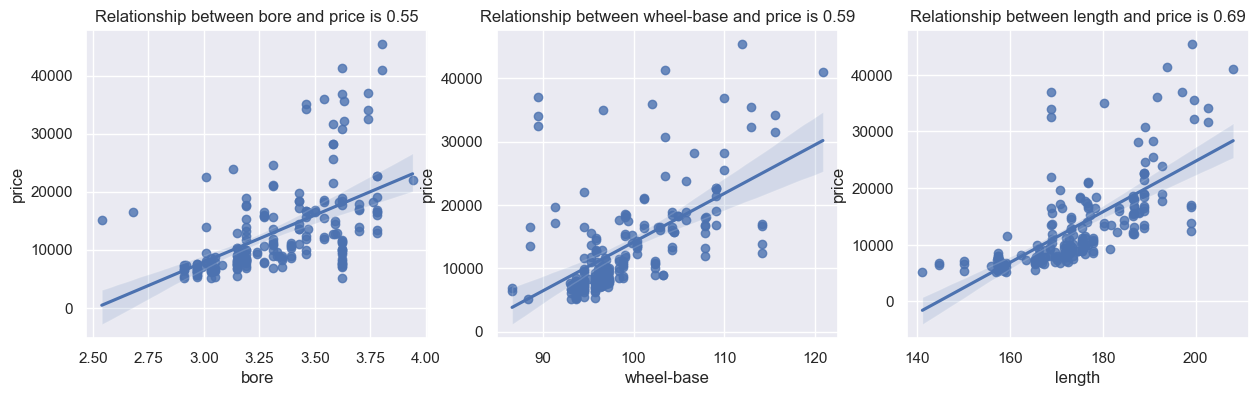

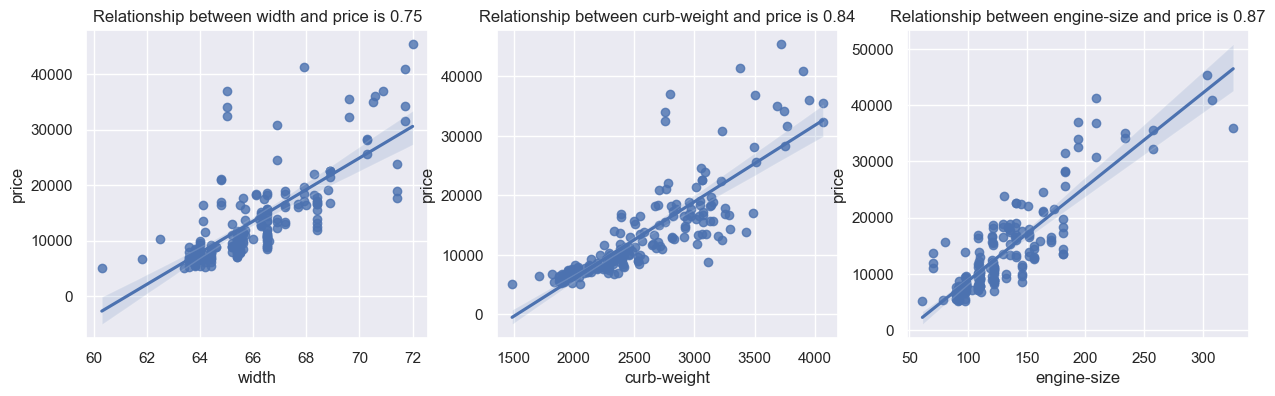

In [18]:
plotter(df, 'bore', 'wheel-base', 'length', 'price')
plotter(df, 'width', 'curb-weight', 'engine-size', 'price')	

In [19]:
def plotter2(dataframe, col1, col2, dep):
    plt.figure(figsize = (40,10))
    sns.set_theme(style='darkgrid')

    plt.subplot(1, 2, 1)
    sns.barplot(data = dataframe, x = col1, y= dep, errorbar=None)
    plt.title(f" {col1} vs {dep}")

    plt.subplot(1, 2, 2)
    sns.barplot(data = dataframe, x = col2, y= dep, errorbar=None)
    plt.title(f" {col2} vs {dep}")

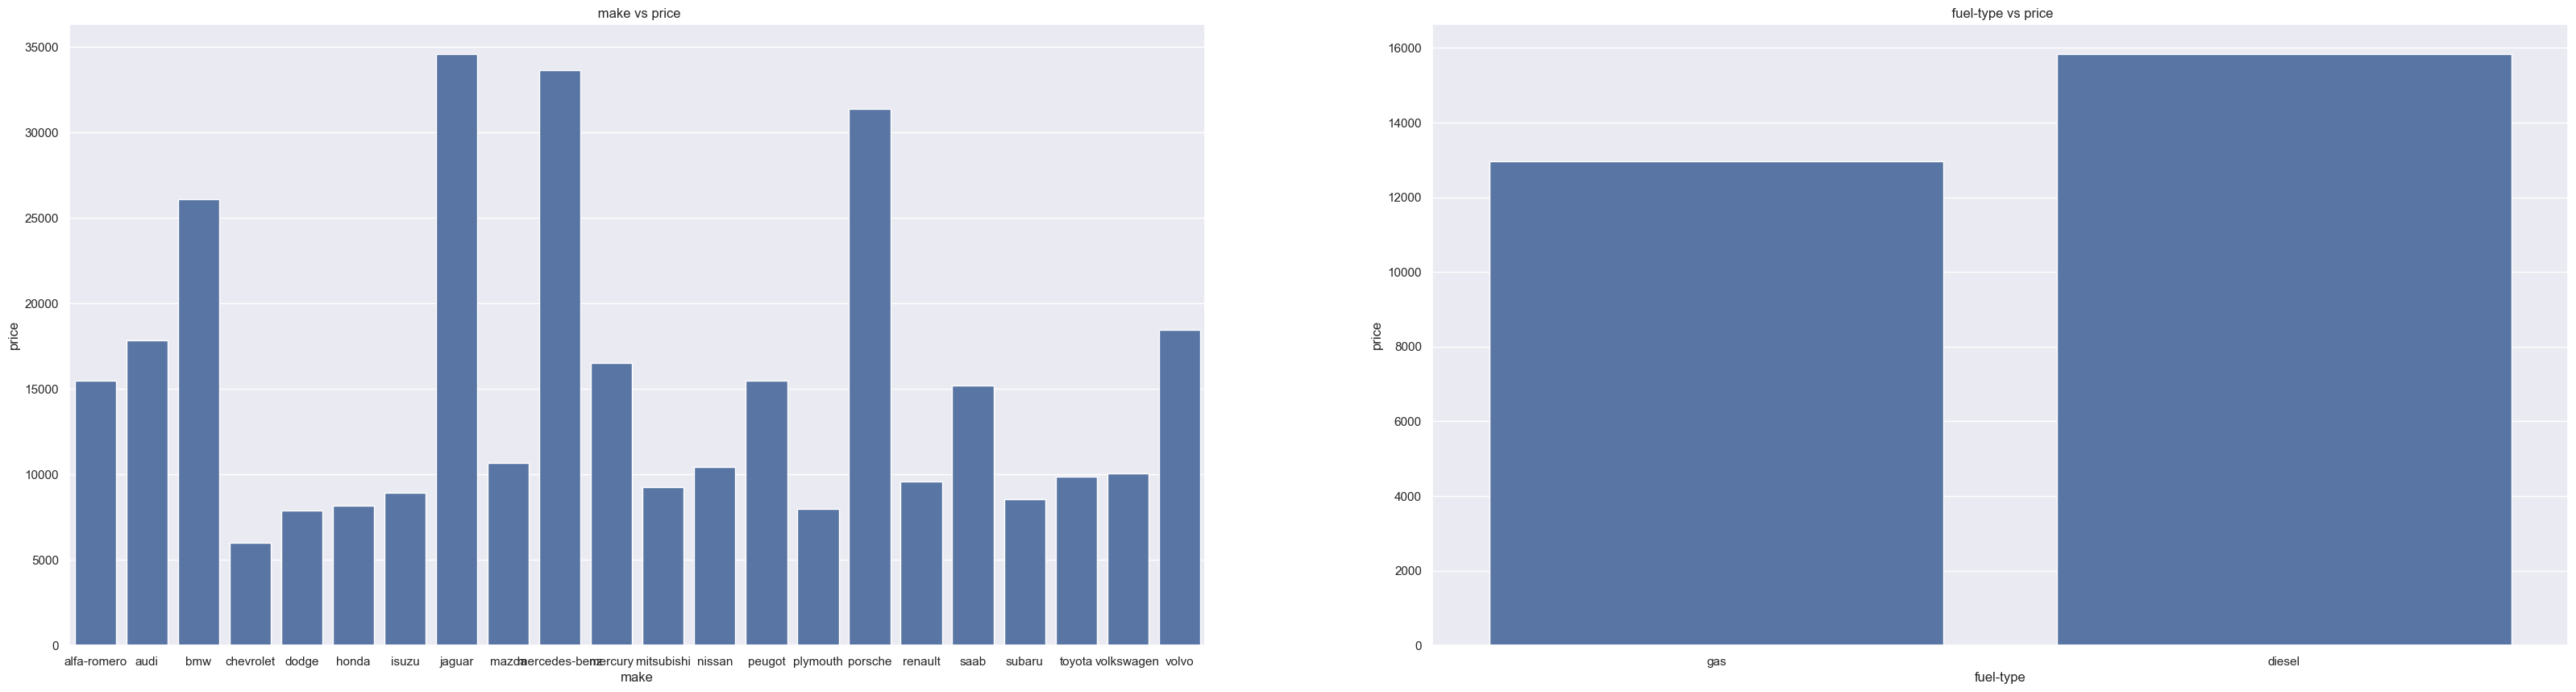

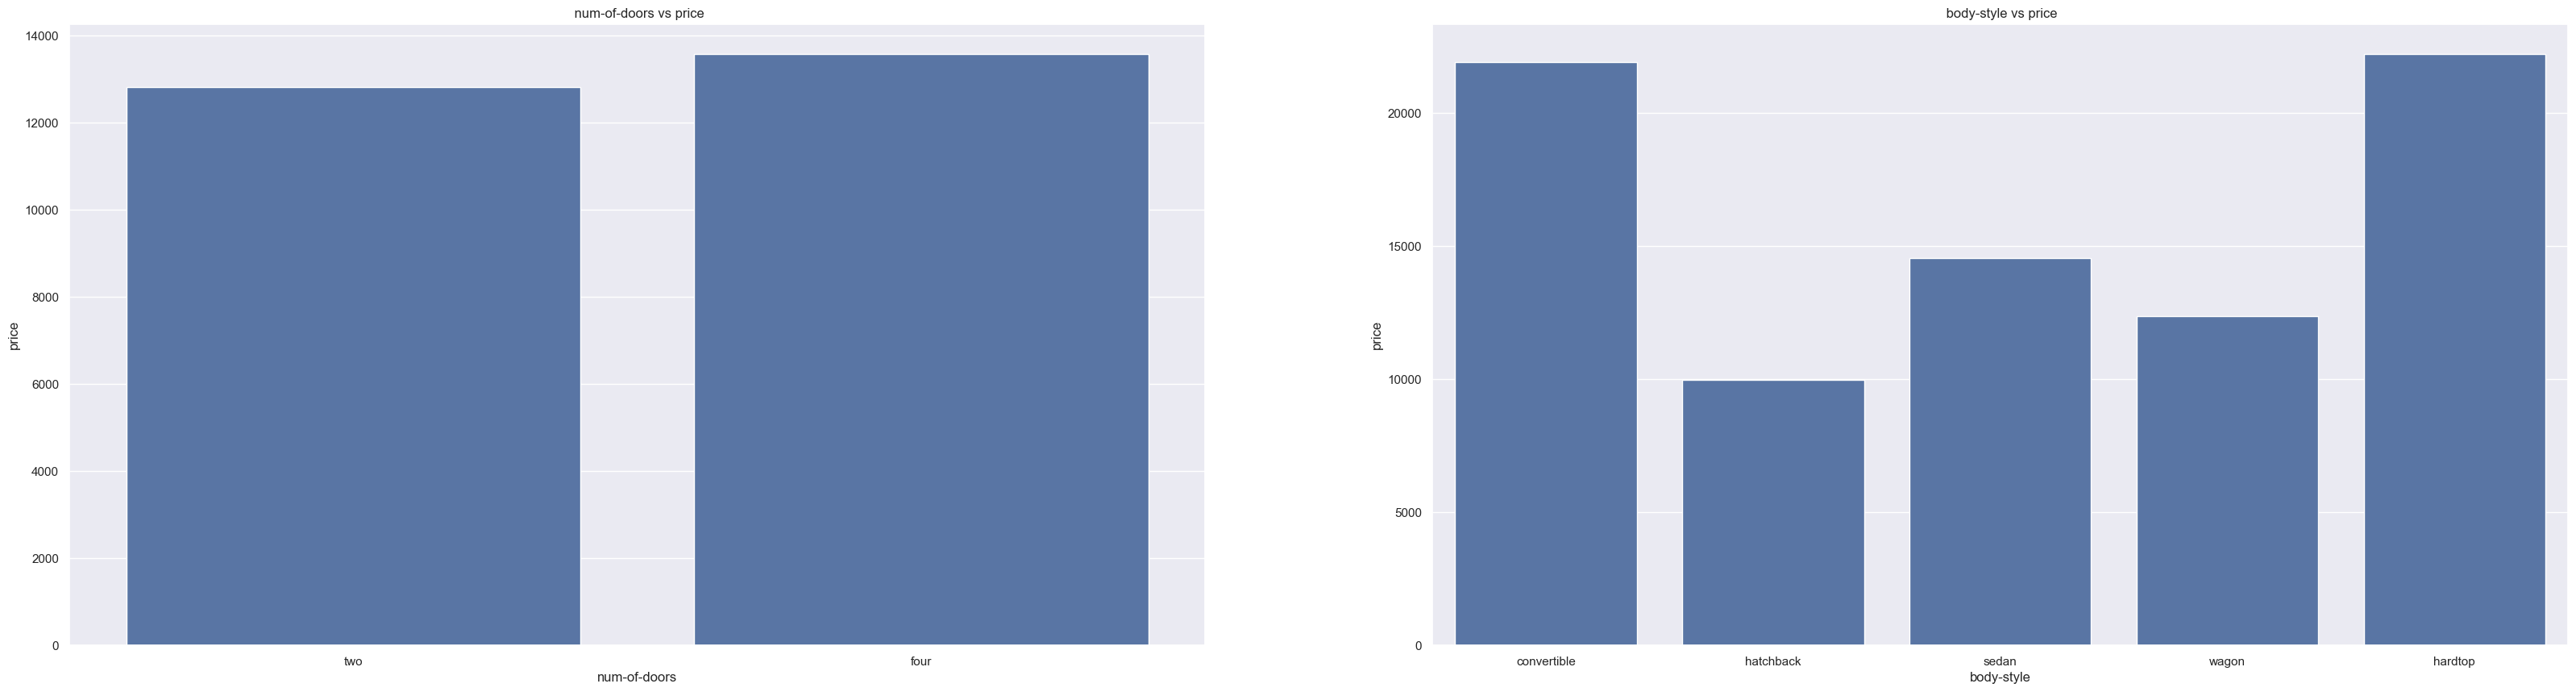

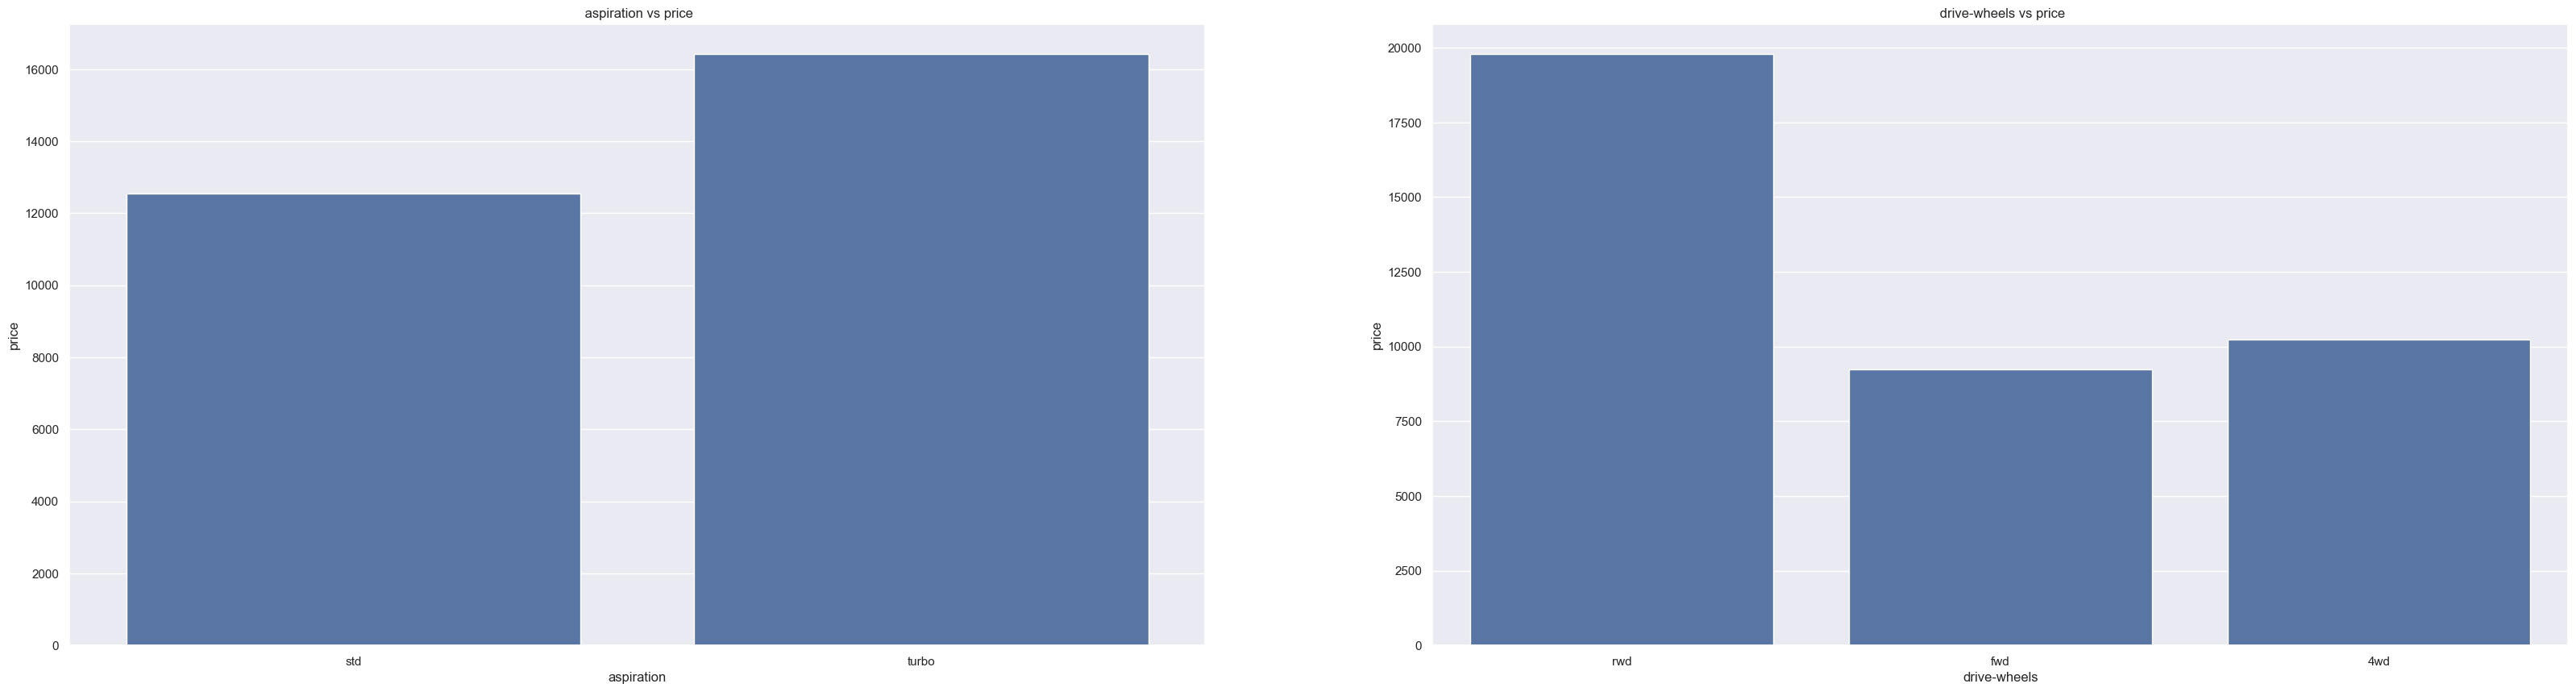

In [20]:
plotter2(df, 'make', 'fuel-type', 'price')
plotter2(df, 'num-of-doors', 'body-style', 'price')
plotter2(df, 'aspiration', 'drive-wheels', 'price')
#						engine-location	engine-type	num-of-cylinders	fuel-system

In [21]:
#encoding categorical data

encoded = {}
for i in cat.columns:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    joblib.dump(encoder, open(f"{i}_encoder.pkl", 'wb'))
    encoded[i + '_encoder'] = encoder
encoded

{'make_encoder': LabelEncoder(),
 'fuel-type_encoder': LabelEncoder(),
 'aspiration_encoder': LabelEncoder(),
 'num-of-doors_encoder': LabelEncoder(),
 'body-style_encoder': LabelEncoder(),
 'drive-wheels_encoder': LabelEncoder(),
 'engine-location_encoder': LabelEncoder(),
 'engine-type_encoder': LabelEncoder(),
 'num-of-cylinders_encoder': LabelEncoder(),
 'fuel-system_encoder': LabelEncoder()}

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,2.68,2.68,21,27,13495
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,2.68,2.68,21,27,16500
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,3.47,3.47,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,3.40,3.40,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,3.40,3.40,18,22,17450


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

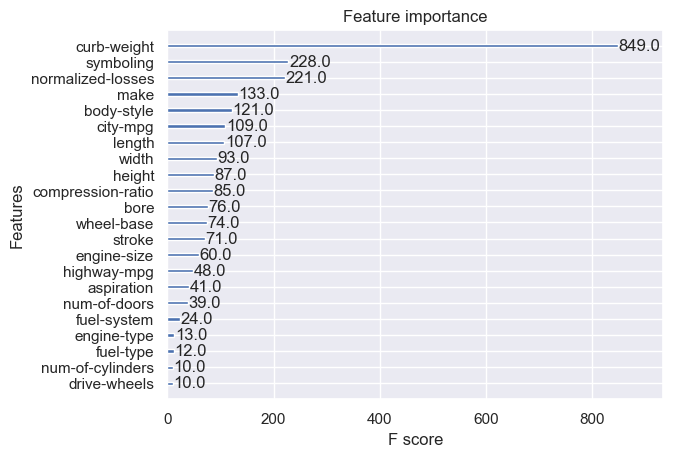

In [23]:
x = df.drop('price', axis = 1)
y = df['price']

model = xgb.XGBRegressor()
model.fit(x,y)

xgb.plot_importance(model, importance_type='weight')

In [24]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [25]:
sel_cols = ['curb-weight', 'symboling', 'normalized-losses', 'make', 'body-style', 'city-mpg','length', 'price' ]
ds = df[sel_cols]
ds.head()

,curb-weight,symboling,normalized-losses,make,body-style,city-mpg,length,price
0,2548,3,115.0,0,0,21,168.8,13495
1,2548,3,115.0,0,0,21,168.8,16500
2,2823,1,115.0,0,2,19,171.2,16500
3,2337,2,164.0,1,3,24,176.6,13950
4,2824,2,164.0,1,3,18,176.6,17450


In [26]:
x = ds.drop('price', axis = 1)
y = ds.price


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=20)

display(xtrain.shape)
display(ytrain.shape)
display(xtest.shape)
display(ytest.shape)

(161, 7)

(161,)

(41, 7)

(41,)

In [28]:
lin_reg = LinearRegression()
model_rfn = RandomForestRegressor()
model_xgb = xgb.XGBRegressor()
model_svr = SVR()

In [29]:
lin_reg.fit(xtrain, ytrain)
model_rfn.fit(xtrain, ytrain)
model_xgb.fit(xtrain, ytrain)
model_svr.fit(xtrain, ytrain)

SVR()

In [30]:
crossvallin = lin_reg.predict(xtrain)
print(f"For Linear Regression, cross val score is: {r2_score(crossvallin, ytrain)}")

crossvalrfn = model_rfn.predict(xtrain)
print(f"For Random Forest, cross val score is: {r2_score(crossvalrfn, ytrain)}")

crossvalxgb = model_xgb.predict(xtrain)
print(f"For XGBoost, cross val score is: {r2_score(crossvalxgb, ytrain)}")

crossvalsvr = model_svr.predict(xtrain)
print(f"For SVR, cross val score is: {r2_score(crossvalsvr, ytrain)}")

For Linear Regression, cross val score is: 0.6584833990948338
For Random Forest, cross val score is: 0.9839294666727254
For XGBoost, cross val score is: 0.9996484092581248
For SVR, cross val score is: -791983.6547079486


In [31]:
y_predlin = lin_reg.predict(xtest)
print(f"For Linear Regression, y predicted score is: {r2_score(y_predlin, ytest)}")

y_predrfn = model_rfn.predict(xtest)
print(f"For Random Forest, y predicted score is: {r2_score(y_predrfn, ytest)}")

y_predxgb = model_xgb.predict(xtest)
print(f"For XGBoost, y predicted score is: {r2_score(y_predxgb, ytest)}")

y_predsvr = model_svr.predict(xtest)
print(f"For SVR, y predicted score is: {r2_score(y_predsvr, ytest)}")

For Linear Regression, y predicted score is: 0.8562130721593684
For Random Forest, y predicted score is: 0.8937915002749937
For XGBoost, y predicted score is: 0.8897453883459524
For SVR, y predicted score is: -653524.9788068736


In [32]:
#both xgb boost and random forest seems okay for the prediction
joblib.dump(model_xgb, open('model_xgb.pkl', 'wb'))
joblib.dump(model_rfn, open('model_rfn.pkl', 'wb'))